In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load dataset
txn = pd.read_excel('Interview_test_data.xlsx', sheet_name='Transactions')
card = pd.read_excel('Interview_test_data.xlsx', sheet_name='Card data')
lkup = pd.read_excel('Interview_test_data.xlsx', sheet_name='Dictionary')

In [ ]:
#definitions
lkup

,ACQUIRER_COUNTRY_NAME,Country name of the acquiring bank
0,AVS_CHECK,Address Verification System (AVS) check result
1,BILLING_ADDRESS_COUNTRY,Country of the billing address - address of th...
2,CARD_BIN,The Bank Identification Number (BIN) of the card
3,CARD_EXPIRY_MONTH,The month of expiration for the card
4,CARD_EXPIRY_YEAR,The year of expiration for the card
5,CARD_FINGERPRINT,Unique fingerprint associated with the card
6,CARD_SCHEME,Scheme of the transaction (visa / mastercard)
7,CARD_SCHEME_LOCAL,Local scheme of the transaction for co-brande...
8,CARD_TYPE,"The type of the payment card (e.g., debit, cre..."
9,CURRENCY,The currency used for the transaction


In [ ]:
txn.shape

(10000, 26)

In [ ]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TRANSACTION_DATE             10000 non-null  datetime64[ns]
 1   IS_CARD_VERIFICATION         10000 non-null  bool          
 2   CURRENCY                     10000 non-null  object        
 3   TRANSACTION_AMOUNT_EUR       10000 non-null  float64       
 4   MERCHANT_CATEGORY_CODE       10000 non-null  object        
 5   CARD_SCHEME                  10000 non-null  object        
 6   CARD_SCHEME_LOCAL            2978 non-null   object        
 7   IS_NETWORK_TOKEN_USED        10000 non-null  bool          
 8   BILLING_ADDRESS_COUNTRY      22 non-null     object        
 9   IS_BILLING_POSTCODE_PRESENT  10000 non-null  object        
 10  AVS_CHECK                    9500 non-null   object        
 11  STORED_CARD                  10000 non-nul

In [ ]:
txn.head()

,TRANSACTION_DATE,IS_CARD_VERIFICATION,CURRENCY,TRANSACTION_AMOUNT_EUR,MERCHANT_CATEGORY_CODE,CARD_SCHEME,CARD_SCHEME_LOCAL,IS_NETWORK_TOKEN_USED,BILLING_ADDRESS_COUNTRY,IS_BILLING_POSTCODE_PRESENT,...,IS_THREE_DS_CHALLENGED,ACQUIRER_COUNTRY_NAME,IS_RETRIED,HAS_ISO_MESSAGE,CARD_FINGERPRINT,IS_OPTIMISED,IS_CONTROL_GROUP,IS_AUTHORISED,DECLINE_REASON,GATEWAY_RESPONSE_SUMMARY
0,2023-09-06,False,EUR,111.68,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,True,NaN,empty,...,NaN,FR,False,True,4863C729258D6BE17FC6D17D08D27BAE5255F894BA4FC0...,True,False,1,approved,Approved
1,2023-09-02,False,EUR,46.96,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,False,NaN,empty,...,NaN,FR,False,True,9B2E6E1BC52DF44BEE7CB2C92C057FE0F7137E3E665480...,True,False,1,approved,Approved
2,2023-09-02,False,EUR,14.89,"5691 - MEN""S & WOMEN""S CLOTHING STORES",mastercard,NaN,False,NaN,empty,...,NaN,FR,False,True,90386C02C679F8BD71C4C1A7AC206DD4EE5FB235BE143B...,True,False,1,approved,Approved
3,2023-09-03,False,EUR,21.05,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,False,NaN,empty,...,NaN,FR,False,True,271306D60D4191B126CD9D3C44931CADF90D958A7B2B01...,True,False,1,approved,Approved
4,2023-09-07,False,EUR,40.96,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,visa,cartes_bancaires,False,NaN,empty,...,NaN,FR,False,True,9B5821708F6EE8D8A395C79C552179048D24FB1F782209...,True,False,1,approved,Approved


In [ ]:
card.shape

(12864, 7)

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   card_fingerprint     12864 non-null  object
 1   card_expiry_year     12864 non-null  int64 
 2   card_expiry_month    12864 non-null  int64 
 3   card_type            12864 non-null  object
 4   card_bin             12864 non-null  int64 
 5   issuer_name          12864 non-null  object
 6   issuer_country_name  12864 non-null  object
dtypes: int64(3), object(4)
memory usage: 703.6+ KB


In [ ]:
card.head()

,card_fingerprint,card_expiry_year,card_expiry_month,card_type,card_bin,issuer_name,issuer_country_name
0,0005C363AEC537ECC292E94F8F291BDD5C4D8634BF2653...,2025,1,debit,557427,CURVE UK LIMITED,Italy
1,0031BF686FED7E99A42905FD12BCCCC62300055229AD38...,2026,4,credit,453997,NEXI PAYMENTS S.P.A.,Italy
2,00382946275A70B0CF80CD7DC9382805688BD582F3D923...,2025,10,debit,497037,LA BANQUE POSTALE,France
3,0042C2C62103FE65739302B533565EB72A2004E2692D61...,2030,8,debit,418820,BANCO BILBAO VIZCAYA ARGENTARIA S.A. (BBVA),Spain
4,0046E03C3073BB4F72127D97542E2AD125A34A5F2F7817...,2025,2,deferred debit,407482,BNP PARIBAS,France


In [ ]:
#checking for duplicates in card dataset before joining
card['card_fingerprint'].duplicated().value_counts()

,count
card_fingerprint,
False,12864


In [ ]:
#renamed column to join txn and card datasets
card.rename(columns={'card_fingerprint': 'CARD_FINGERPRINT'}, inplace=True)
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CARD_FINGERPRINT     12864 non-null  object
 1   card_expiry_year     12864 non-null  int64 
 2   card_expiry_month    12864 non-null  int64 
 3   card_type            12864 non-null  object
 4   card_bin             12864 non-null  int64 
 5   issuer_name          12864 non-null  object
 6   issuer_country_name  12864 non-null  object
dtypes: int64(3), object(4)
memory usage: 703.6+ KB


In [ ]:
#joining txn and card datasets
txnj = txn.merge(card, on='CARD_FINGERPRINT', how='left', validate='m:1')

In [ ]:
txnj.shape

(10000, 32)

In [ ]:
txnj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TRANSACTION_DATE             10000 non-null  datetime64[ns]
 1   IS_CARD_VERIFICATION         10000 non-null  bool          
 2   CURRENCY                     10000 non-null  object        
 3   TRANSACTION_AMOUNT_EUR       10000 non-null  float64       
 4   MERCHANT_CATEGORY_CODE       10000 non-null  object        
 5   CARD_SCHEME                  10000 non-null  object        
 6   CARD_SCHEME_LOCAL            2978 non-null   object        
 7   IS_NETWORK_TOKEN_USED        10000 non-null  bool          
 8   BILLING_ADDRESS_COUNTRY      22 non-null     object        
 9   IS_BILLING_POSTCODE_PRESENT  10000 non-null  object        
 10  AVS_CHECK                    9500 non-null   object        
 11  STORED_CARD                  10000 non-nul

In [ ]:
txnj.head()

,TRANSACTION_DATE,IS_CARD_VERIFICATION,CURRENCY,TRANSACTION_AMOUNT_EUR,MERCHANT_CATEGORY_CODE,CARD_SCHEME,CARD_SCHEME_LOCAL,IS_NETWORK_TOKEN_USED,BILLING_ADDRESS_COUNTRY,IS_BILLING_POSTCODE_PRESENT,...,IS_CONTROL_GROUP,IS_AUTHORISED,DECLINE_REASON,GATEWAY_RESPONSE_SUMMARY,card_expiry_year,card_expiry_month,card_type,card_bin,issuer_name,issuer_country_name
0,2023-09-06,False,EUR,111.68,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,True,NaN,empty,...,False,1,approved,Approved,2024,5,prepaid,530446,PREPAID FINANCIAL SERVICES LTD,France
1,2023-09-02,False,EUR,46.96,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,False,NaN,empty,...,False,1,approved,Approved,2027,7,debit,548913,OPEN BANK S.A.,Spain
2,2023-09-02,False,EUR,14.89,"5691 - MEN""S & WOMEN""S CLOTHING STORES",mastercard,NaN,False,NaN,empty,...,False,1,approved,Approved,2023,10,credit,518988,BANCO COMERCIAL PORTUGUES S.A.,Portugal
3,2023-09-03,False,EUR,21.05,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,mastercard,NaN,False,NaN,empty,...,False,1,approved,Approved,2025,5,debit,510133,"SERVIRED, SOCIEDAD ESPANOLA DE MEDIOS DE PAGO ...",Spain
4,2023-09-07,False,EUR,40.96,5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS,visa,cartes_bancaires,False,NaN,empty,...,False,1,approved,Approved,2026,6,debit,497355,SOCIETE GENERALE S.A.,France


In [ ]:
txnj.isnull().sum().sort_values(ascending=False)

,0
BILLING_ADDRESS_COUNTRY,9978
IS_THREE_DS_CHALLENGED,8346
CARD_SCHEME_LOCAL,7022
AVS_CHECK,500
CVV_PRESENT,421
CVV_CHECK,420
ACQUIRER_COUNTRY_NAME,17
TRANSACTION_DATE,0
IS_NETWORK_TOKEN_USED,0
CARD_SCHEME,0


In [ ]:
#exploring summary statistics of categorical variables
cat_vars = txnj.iloc[:,np.r_[1:3,4:32]]

for column in cat_vars:
    print(txnj[column].value_counts())
    print(txnj[column].value_counts(normalize=True))
    print('-' * 50)

IS_CARD_VERIFICATION
False    9072
True      928
Name: count, dtype: int64
IS_CARD_VERIFICATION
False    0.9072
True     0.0928
Name: proportion, dtype: float64
--------------------------------------------------
CURRENCY
EUR    8546
GBP    1442
CHF       6
USD       3
SEK       2
AED       1
Name: count, dtype: int64
CURRENCY
EUR    0.8546
GBP    0.1442
CHF    0.0006
USD    0.0003
SEK    0.0002
AED    0.0001
Name: proportion, dtype: float64
--------------------------------------------------
MERCHANT_CATEGORY_CODE
5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS    7167
5691 - MEN"S & WOMEN"S CLOTHING STORES             2833
Name: count, dtype: int64
MERCHANT_CATEGORY_CODE
5999 - MISCELLANEOUS AND SPECIALTY RETAIL SHOPS    0.7167
5691 - MEN"S & WOMEN"S CLOTHING STORES             0.2833
Name: proportion, dtype: float64
--------------------------------------------------
CARD_SCHEME
visa          5486
mastercard    4514
Name: count, dtype: int64
CARD_SCHEME
visa          0.5486
mastercard 

*   Explore: Network token, Optimisation, Stored Card, 3DS, Country, Decline Reason, Card type, Card scheme
*   Avoid: fields with nulls



In [ ]:
#exploring summary statistics of numerical variables

txnj[['TRANSACTION_AMOUNT_EUR','TRANSACTION_DATE']].describe()

,TRANSACTION_AMOUNT_EUR,TRANSACTION_DATE
count,10000.000000,10000
mean,43.756525,2023-09-03 23:34:13.440000
min,0.000000,2023-09-01 00:00:00
25%,11.864750,2023-09-02 00:00:00
50%,30.100000,2023-09-04 00:00:00
75%,57.237500,2023-09-06 00:00:00
max,1479.600000,2023-09-07 00:00:00
std,54.772092,NaN




*   Date range: 2023/09/01 - 2023/09/07
*   Transaction Amt range: 0€-1479.60€
*   Avg Transaction Amt: 43.76€
*   Transaction Amt = skewed distribution



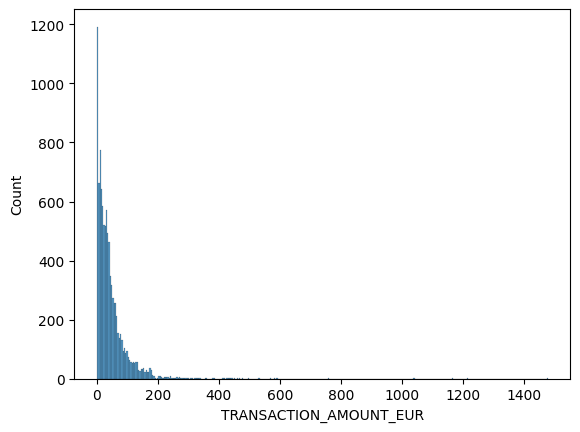

In [ ]:
sns.histplot(data=txnj, x='TRANSACTION_AMOUNT_EUR')
plt.show()

In [ ]:
txnj['IS_AUTHORISED'].value_counts(normalize=True)*100

,proportion
IS_AUTHORISED,
1,86.88
0,13.12




*   Authorization Rate = 86.88%



In [ ]:
#create and view overall metrics related to attempts and authorisation rate
metrics = pd.Series({
    'pay_attempt_cnt': len(txnj),
    'auth_cnt': txnj['IS_AUTHORISED'].sum(),
    'auth_rt_pct': txnj['IS_AUTHORISED'].mean()*100,
    'tot_attempted_amount': txnj['TRANSACTION_AMOUNT_EUR'].sum(),
    'tot_auth_amount': txnj.loc[txnj['IS_AUTHORISED'] == 1, 'TRANSACTION_AMOUNT_EUR'].sum(),
})

metrics

,0
pay_attempt_cnt,10000.000
auth_cnt,8688.000
auth_rt_pct,86.880
tot_attempted_amount,437565.247
tot_auth_amount,366463.223


In [ ]:
#create function to return metrics for multiple data points for univariate analysis

def metrics_fxn(df: pd.DataFrame, group_cols):

    if isinstance(group_cols, str):
        group_cols = [group_cols]

    out = (df
           .groupby(group_cols, dropna=False)
           .agg(
                pay_attempt_cnt=('IS_AUTHORISED', 'size'),
                authorised_cnt=('IS_AUTHORISED', 'sum'),
                auth_rt=('IS_AUTHORISED', 'mean'),
                tot_attempted_amt=('TRANSACTION_AMOUNT_EUR', 'sum'),
                tot_auth_amt=('TRANSACTION_AMOUNT_EUR', lambda s: s[df.loc[s.index, 'IS_AUTHORISED'] == 1].sum())
           )
           .reset_index()
          )

    out['auth_rt_pct'] = out['auth_rt']*100

    return out.sort_values('auth_rt_pct', ascending=False)


In [ ]:
#define data points to run in metrics function
data_points = [
    'IS_OPTIMISED',
    'HAS_THREE_DS',
    'STORED_CARD',
    'IS_NETWORK_TOKEN_USED',
    'CARD_SCHEME',
    'issuer_country_name',
    'card_type'
]

for dp in data_points:
    if dp in txnj.columns:
        print(f'\n================ KPI by {dp} ================\n')
        display(metrics_fxn(txnj, dp))



================ KPI by IS_OPTIMISED ================



,IS_OPTIMISED,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
1,True,9383,8190,0.872855,414013.187,348050.881,87.285516
0,False,617,498,0.807131,23552.060,18412.342,80.713128



================ KPI by HAS_THREE_DS ================



,HAS_THREE_DS,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
0,False,8328,7738,0.929155,306626.609,281479.506,92.915466
1,True,1672,950,0.568182,130938.638,84983.717,56.818182



================ KPI by STORED_CARD ================



,STORED_CARD,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
0,False,7699,6721,0.872971,377311.597,316037.545,87.297052
1,True,2301,1967,0.854846,60253.650,50425.678,85.484572



================ KPI by IS_NETWORK_TOKEN_USED ================



,IS_NETWORK_TOKEN_USED,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
1,True,1719,1534,0.892379,89349.135,77436.954,89.237929
0,False,8281,7154,0.863905,348216.112,289026.269,86.390533



================ KPI by CARD_SCHEME ================



,CARD_SCHEME,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
1,visa,5486,4781,0.871491,249911.335,209181.756,87.149107
0,mastercard,4514,3907,0.865529,187653.912,157281.467,86.552946



================ KPI by issuer_country_name ================



,issuer_country_name,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
4,United Kingdom,1457,1326,0.910089,70520.944,63790.328,91.008922
3,Spain,2420,2151,0.888843,114732.499,99988.679,88.884298
1,Italy,1427,1234,0.864751,26051.350,20877.320,86.475123
2,Portugal,1153,993,0.861232,14547.729,12027.169,86.123157
0,France,3543,2984,0.842224,211712.725,169779.727,84.222410



================ KPI by card_type ================



,card_type,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
0,credit,1887,1690,0.895601,65390.448,58171.297,89.560148
1,debit,6763,5889,0.870767,333643.462,278873.206,87.076741
2,deferred debit,127,108,0.850394,7644.850,5920.380,85.039370
3,prepaid,1223,1001,0.818479,30886.487,23498.340,81.847915


Is Optimised
*   Optimised = 87.3% auth rate vs Non-Optimised = 80.7%
*   Optimisation has large significance and improved authorisation rate
*   6% of attempts are not optimized. How many are control group?

Has 3DS
*   Non-3DS = 92.9% auth rate vs 3DS = 56.8%
*   3DS attempts = 16.7%
*   Low auth rate for 3DS could be due to human/customer error (ex: entering the wrong code)

Stored Card
*   77% of attempts did not have stored card information
*   Non-Stored = 87.3% auth rate vs Stored = 85.5%
*   Stored should perform better in theory as these are repeat customers
*   Potential room for improvement for Stored cards

Network Token Used
*   Token = 89.2% vs No Token = 86.4%
*   Token attempts = 1719
*   Network Tokenization improved authorisation rate
*   Could this help improve Stored Card metrics?

Card Scheme
*   Similar auth rates between visa and mastercard
*   Visa = 87.1% auth rate vs Mastercard = 86.6%

Issuer Country
*   France = 84.2% auth rate, which is the lowest, and has highest number of attempts and attempted transaction amount
*   UK is the only one over 90%
*   Are they not as optimised vs UK?

Card Type
*   Prepaid cards = 81.8% auth rate, lowest

In [ ]:
#define declined to view only failed attempts
declined = txnj[txnj['IS_AUTHORISED'] == 0]

declined.groupby(['HAS_THREE_DS', 'DECLINE_REASON']).size().reset_index(name='count').sort_values('count', ascending=False)

,HAS_THREE_DS,DECLINE_REASON,count
13,True,user-input,500
3,False,financial,385
7,False,user-input,110
9,True,config-error,83
11,True,risk-assessment,60
8,True,ambiguous,46
4,False,risk-assessment,44
10,True,financial,32
2,False,config-error,26
1,False,blocked,16


*   Top decline reason for 3DS = user input, which confirms customer error
*   Top decline reason for Non-3DS = financial



In [ ]:
#define data points to run in metrics function for bivariate analysis
bivariate_analysis = [
    ['HAS_THREE_DS', 'issuer_country_name'],
    ['IS_OPTIMISED', 'issuer_country_name'],
    ['IS_NETWORK_TOKEN_USED', 'STORED_CARD'],
    ['HAS_THREE_DS', 'card_type'],
    ['issuer_country_name', 'card_type'],
    ['HAS_THREE_DS', 'IS_OPTIMISED'],
    ['CARD_SCHEME', 'card_type'],
    ['issuer_country_name', 'ACQUIRER_COUNTRY_NAME'],
    ['IS_OPTIMISED', 'IS_CONTROL_GROUP']

]

for ba in bivariate_analysis:
    print(f'\n======== KPI by {' × '.join(ba)} ========\n')
    display(metrics_fxn(txnj, ba))



======== KPI by HAS_THREE_DS × issuer_country_name ========



,HAS_THREE_DS,issuer_country_name,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
4,False,United Kingdom,1360,1284,0.944118,62667.755,59020.000,94.411765
2,False,Portugal,1008,950,0.942460,11265.459,10530.969,94.246032
1,False,Italy,1207,1123,0.930406,14615.490,13511.500,93.040597
3,False,Spain,2214,2057,0.929088,99642.849,92257.079,92.908762
0,False,France,2539,2324,0.915321,118435.056,106159.958,91.532099
5,True,France,1004,660,0.657371,93277.669,63619.769,65.737052
6,True,Italy,220,111,0.504545,11435.860,7365.820,50.454545
8,True,Spain,206,94,0.456311,15089.650,7731.600,45.631068
9,True,United Kingdom,97,42,0.432990,7853.189,4770.328,43.298969
7,True,Portugal,145,43,0.296552,3282.270,1496.200,29.655172



======== KPI by IS_OPTIMISED × issuer_country_name ========



,IS_OPTIMISED,issuer_country_name,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
9,True,United Kingdom,1373,1258,0.916242,67368.984,61108.267,91.624181
8,True,Spain,2288,2046,0.894231,108005.438,95210.248,89.423077
7,True,Portugal,1053,917,0.870845,13473.999,11232.169,87.084520
6,True,Italy,1309,1134,0.866310,24038.780,19270.740,86.631016
1,False,Italy,118,100,0.847458,2012.570,1606.580,84.745763
5,True,France,3360,2835,0.843750,201125.986,161229.457,84.375000
0,False,France,183,149,0.814208,10586.739,8550.270,81.420765
4,False,United Kingdom,84,68,0.809524,3151.960,2682.061,80.952381
3,False,Spain,132,105,0.795455,6727.061,4778.431,79.545455
2,False,Portugal,100,76,0.760000,1073.730,795.000,76.000000



======== KPI by IS_NETWORK_TOKEN_USED × STORED_CARD ========



,IS_NETWORK_TOKEN_USED,STORED_CARD,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
3,True,True,134,124,0.925373,5651.951,5319.069,92.537313
2,True,False,1585,1410,0.889590,83697.184,72117.885,88.958991
0,False,False,6114,5311,0.868662,293614.413,243919.660,86.866209
1,False,True,2167,1843,0.850485,54601.699,45106.609,85.048454



======== KPI by HAS_THREE_DS × card_type ========



,HAS_THREE_DS,card_type,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
2,False,deferred debit,94,90,0.957447,4537.810,4308.580,95.744681
0,False,credit,1695,1618,0.954572,52886.090,50196.756,95.457227
1,False,debit,5495,5102,0.928480,228303.921,208664.994,92.848044
3,False,prepaid,1044,928,0.888889,20898.788,18309.176,88.888889
5,True,debit,1268,787,0.620662,105339.541,70208.212,62.066246
6,True,deferred debit,33,18,0.545455,3107.040,1611.800,54.545455
7,True,prepaid,179,73,0.407821,9987.699,5189.164,40.782123
4,True,credit,192,72,0.375000,12504.358,7974.541,37.500000



======== KPI by issuer_country_name × card_type ========



,issuer_country_name,card_type,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
14,United Kingdom,credit,173,162,0.936416,11994.189,11124.888,93.641618
4,Italy,credit,236,216,0.915254,4782.760,4249.990,91.525424
15,United Kingdom,debit,1246,1133,0.909310,56609.447,50853.050,90.930979
11,Spain,credit,612,556,0.908497,27584.300,24509.130,90.849673
12,Spain,debit,1539,1383,0.898635,74495.579,65980.599,89.863548
0,France,credit,220,195,0.886364,13372.050,11701.730,88.636364
5,Italy,debit,356,314,0.882022,7807.830,6504.410,88.202247
8,Portugal,credit,646,561,0.868421,7657.149,6585.559,86.842105
2,France,deferred debit,123,106,0.861789,7440.510,5920.380,86.178862
9,Portugal,debit,493,424,0.860041,6592.080,5375.010,86.004057



======== KPI by HAS_THREE_DS × IS_OPTIMISED ========



,HAS_THREE_DS,IS_OPTIMISED,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
1,False,True,7907,7384,0.933856,295153.413,272416.020,93.385608
0,False,False,421,354,0.840855,11473.196,9063.486,84.085511
2,True,False,196,144,0.734694,12078.864,9348.856,73.469388
3,True,True,1476,806,0.546070,118859.774,75634.861,54.607046



======== KPI by CARD_SCHEME × card_type ========



,CARD_SCHEME,card_type,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
0,mastercard,credit,756,684,0.904762,28959.449,25867.809,90.476190
3,visa,credit,1131,1006,0.889478,36430.999,32303.488,88.947834
1,mastercard,debit,2879,2510,0.871830,138229.121,115786.723,87.183050
4,visa,debit,3884,3379,0.869979,195414.341,163086.483,86.997940
5,visa,deferred debit,127,108,0.850394,7644.850,5920.380,85.039370
6,visa,prepaid,344,288,0.837209,10421.145,7871.405,83.720930
2,mastercard,prepaid,879,713,0.811149,20465.342,15626.935,81.114903



======== KPI by issuer_country_name × ACQUIRER_COUNTRY_NAME ========



,issuer_country_name,ACQUIRER_COUNTRY_NAME,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
1,France,GB,2,2,1.000000,340.673,340.673,100.000000
9,Portugal,SG,1,1,1.000000,102.959,102.959,100.000000
12,Spain,GB,1,1,1.000000,14.778,14.778,100.000000
6,Italy,SG,1,1,1.000000,530.470,530.470,100.000000
13,Spain,SG,1,1,1.000000,6.221,6.221,100.000000
16,United Kingdom,GB,1444,1318,0.912742,69571.996,63176.642,91.274238
11,Spain,FR,2417,2149,0.889119,114700.800,99967.680,88.911874
8,Portugal,FR,1142,992,0.868651,14412.140,11924.210,86.865149
4,Italy,FR,1419,1232,0.868217,25406.520,20332.260,86.821705
0,France,FR,3539,2982,0.842611,211204.624,169439.054,84.261091



======== KPI by IS_OPTIMISED × IS_CONTROL_GROUP ========



,IS_OPTIMISED,IS_CONTROL_GROUP,pay_attempt_cnt,authorised_cnt,auth_rt,tot_attempted_amt,tot_auth_amt,auth_rt_pct
2,True,False,9383,8190,0.872855,414013.187,348050.881,87.285516
1,False,True,507,421,0.830375,21158.828,16898.997,83.037475
0,False,False,110,77,0.700000,2393.232,1513.345,70.000000




3DS is a big driver of the failure rate
*   France: Almost 30% of attempts have 3DS vs other countries (ex: UK = 6.7% of attempts with 3DS) -- Big opportunity for improvement
*   Portugal, UK, Spain, and Italy have high non-3DS auth rate in comparison to 3DS

Optimisation has big impact on authorisation rate
*   UK, Spain, and Portugal auth rates are 10% higher with optimisation
*   France could be better if 3DS requirements are reduced, and probably for other countries as well
*   5% is control group

Network tokenisation improves authorisation rates for stored cards
*   If attempt has token and stored card = 92.5% auth rate vs no token and stored card = 85%
*   Even for non-stored cards, attempts with token still has a higher auth rate by 2%

Prepaid cards have highest failure rates across all countries
*   Especially Spain, France, and Portugal
*   Even for non-stored cards, attempts with token still has a higher auth rate by 2%

#Visualizations for presentation

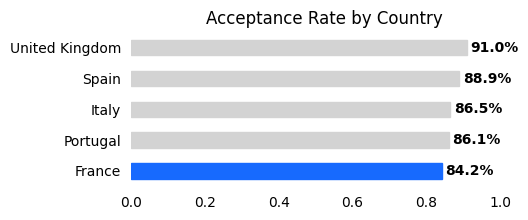

In [ ]:
auth_rt = txnj.groupby('issuer_country_name')['IS_AUTHORISED'].mean().sort_values(ascending=True)

highlight_countries = ['Spain', 'Italy', 'Portugal', 'United Kingdom']

ax = auth_rt.plot(kind='barh', figsize=(5,2))

for bar, country in zip(ax.patches, auth_rt.index):
    if country in highlight_countries:
        bar.set_color('lightgray')
    else:
        bar.set_color('#176afe')

plt.title('Acceptance Rate by Country')
plt.ylabel('')
plt.xlabel('')
plt.xlim(0, 1.05)

for i, value in enumerate(auth_rt.values):
    ax.text(value + 0.01,i,f'{value*100:.1f}%',va='center',fontsize=10,weight='bold')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.show()

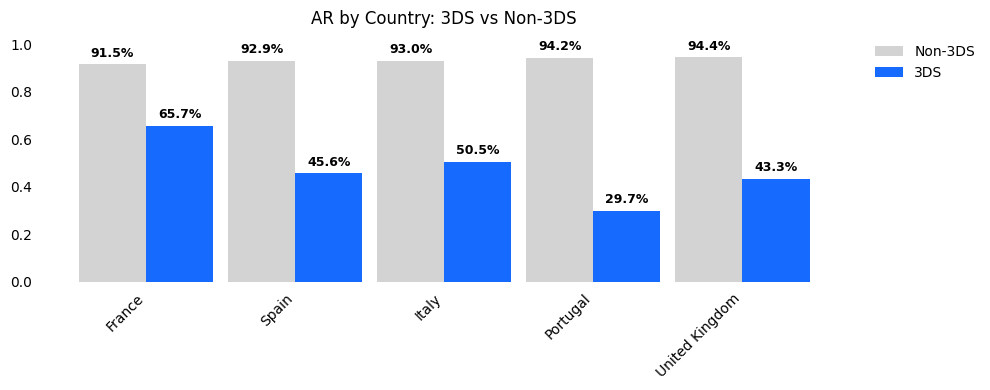

In [ ]:
pivot = (txnj.groupby(['issuer_country_name', 'HAS_THREE_DS'])['IS_AUTHORISED'].mean().unstack())
pivot = pivot.sort_values(by=False)
fig, ax = plt.subplots(figsize=(10,4))

pivot.plot(kind='bar',ax=ax,color=['lightgray', '#176afe'],width=0.9)

ax.set_title('AR by Country: 3DS vs Non-3DS')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_ylim(0, 1.05)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f'{height*100:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            weight='bold'
        )

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)
ax.legend(['Non-3DS', '3DS'], frameon=False, bbox_to_anchor=(1.02, 1),loc='upper left')


plt.tight_layout()
plt.show()


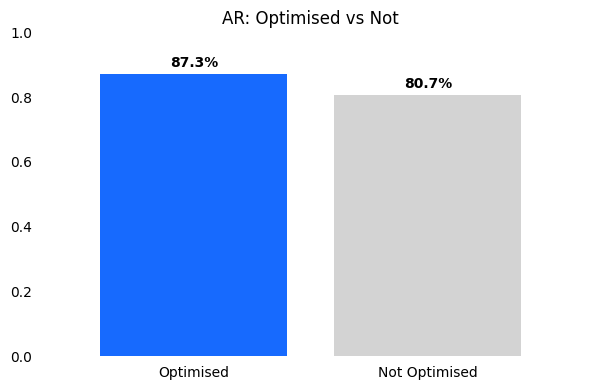

In [ ]:
opt = txnj.groupby('IS_OPTIMISED')['IS_AUTHORISED'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(6,4))

opt.plot(kind='bar',ax=ax,color=['#176afe', 'lightgray'],width=0.8)

plt.title('AR: Optimised vs Not')
plt.ylabel('')
plt.xlabel('')
plt.ylim(0, 1)

ax.set_xticklabels(['Optimised', 'Not Optimised'], rotation=0)

for i, v in enumerate(opt.values):
    ax.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', weight='bold')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()


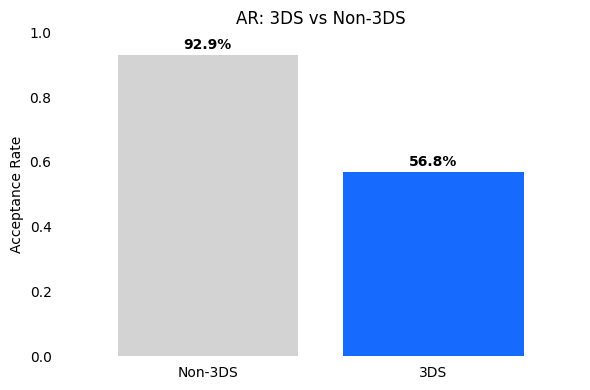

In [ ]:
tds = txnj.groupby('HAS_THREE_DS')['IS_AUTHORISED'].mean()
fig, ax = plt.subplots(figsize=(6,4))

tds.plot(kind='bar',ax=ax,color=['lightgray', '#176afe'],width=0.8)

ax.set_title('AR: 3DS vs Non-3DS')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('')
ax.set_ylim(0, 1)

ax.set_xticklabels(['Non-3DS', '3DS'], rotation=0)

for i, v in enumerate(tds.values):
    ax.text(i,v + 0.02,f'{v*100:.1f}%',ha='center',weight='bold')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()


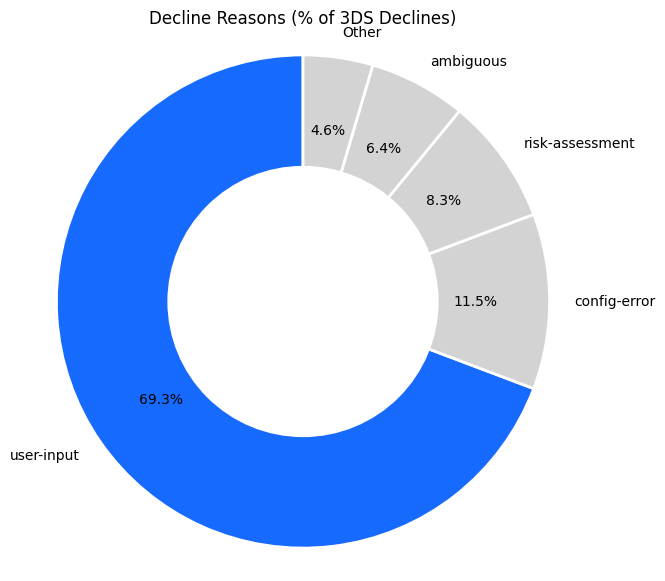

In [ ]:
declines = txnj[(txnj['IS_AUTHORISED'] == 0) & (txnj['HAS_THREE_DS'].astype(bool))].copy()

highlight_reason = 'user-input'

reason_pct = declines['DECLINE_REASON'].value_counts(normalize=True) * 100

top4 = reason_pct.head(4)
other = reason_pct.iloc[4:].sum()

if other > 0:
    reason_pct_plot = pd.concat([top4, pd.Series({'Other': other})])
else:
    reason_pct_plot = top4

colors = [
    '#176afe' if reason == highlight_reason else 'lightgray'
    for reason in reason_pct_plot.index
]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(
    reason_pct_plot.values,
    labels=reason_pct_plot.index,
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)

# donut hole
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

plt.title('Decline Reasons (% of 3DS Declines)')
plt.axis('equal')
plt.show()


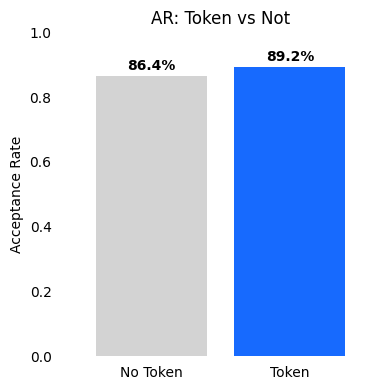

In [ ]:
tds = txnj.groupby('IS_NETWORK_TOKEN_USED')['IS_AUTHORISED'].mean()
fig, ax = plt.subplots(figsize=(4,4))

tds.plot(kind='bar',ax=ax,color=['lightgray', '#176afe'],width=0.8)

ax.set_title('AR: Token vs Not')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('')
ax.set_ylim(0, 1)

ax.set_xticklabels(['No Token', 'Token'], rotation=0)

for i, v in enumerate(tds.values):
    ax.text(i,v + 0.02,f'{v*100:.1f}%',ha='center',weight='bold')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

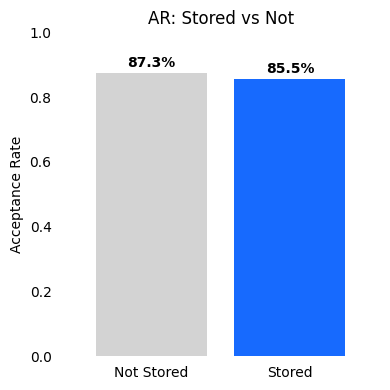

In [ ]:
tds = txnj.groupby('STORED_CARD')['IS_AUTHORISED'].mean()
fig, ax = plt.subplots(figsize=(4,4))

tds.plot(kind='bar',ax=ax,color=['lightgray', '#176afe'],width=0.8)

ax.set_title('AR: Stored vs Not')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('')
ax.set_ylim(0, 1)

ax.set_xticklabels(['Not Stored', 'Stored'], rotation=0)

for i, v in enumerate(tds.values):
    ax.text(i,v + 0.02,f'{v*100:.1f}%',ha='center',weight='bold')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

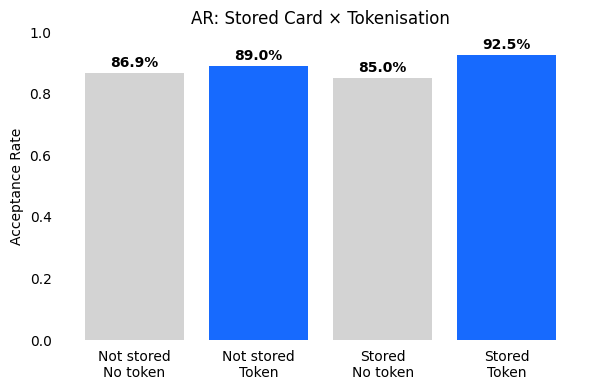

In [ ]:
combo = (
    txnj.groupby(['STORED_CARD', 'IS_NETWORK_TOKEN_USED'])['IS_AUTHORISED']
        .mean()
        .reset_index(name='auth_rate')
)

labels = []
values = []
colors = []

for _, row in combo.iterrows():
    stored = 'Stored' if row['STORED_CARD'] else 'Not stored'
    token = 'Token' if row['IS_NETWORK_TOKEN_USED'] else 'No token'

    labels.append(f'{stored}\n{token}')
    values.append(row['auth_rate'])

    if row['IS_NETWORK_TOKEN_USED']:
        colors.append('#176afe')
    else:
        colors.append('lightgray')

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, values, color=colors)

ax.set_title('AR: Stored Card × Tokenisation')
ax.set_ylabel('Acceptance Rate')
ax.set_xlabel('')
ax.set_ylim(0, 1)

for i, v in enumerate(values):
    ax.text(
        i,
        v + 0.02,
        f'{v*100:.1f}%',
        ha='center',
        weight='bold'
    )

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()
